<a href="https://colab.research.google.com/github/LohithVarun/DSA0615-DataHandlingAndVisualization/blob/main/Analytical%20Programs/Day%20-%201%20AnalyticalPrograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAY 1


1)Plot a line chart where the x-axis represents months and the y-axis represents sales. Overlay a trend line or moving average to highlight long-term trends. Use seasonal decomposition techniques like seasonal subseries plots or seasonal indices to identify seasonal patterns.


---



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

`geom_smooth()` using formula = 'y ~ x'


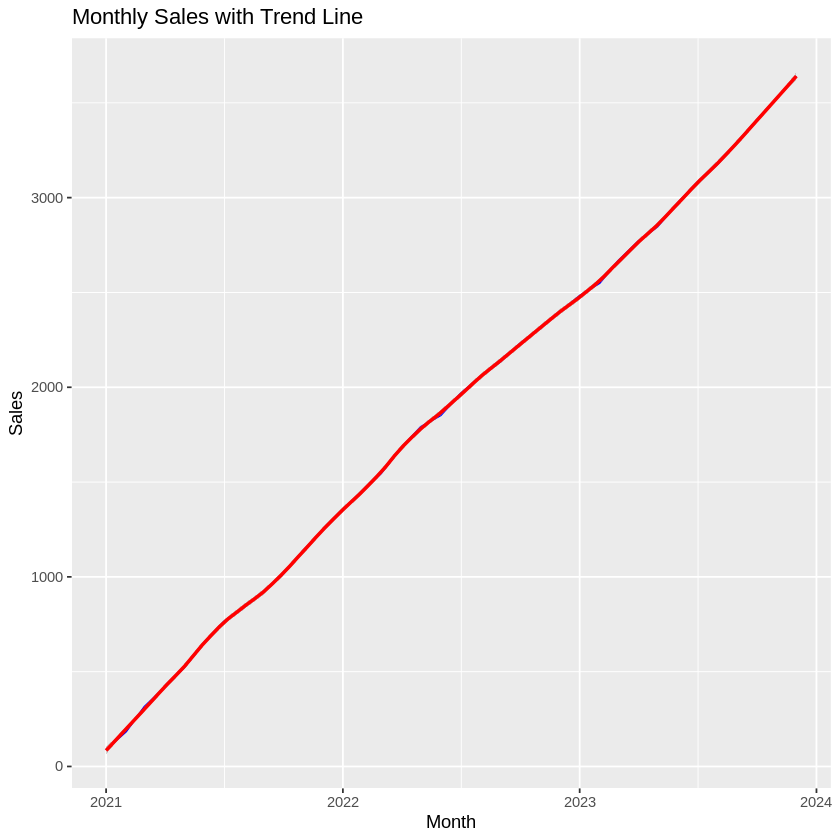

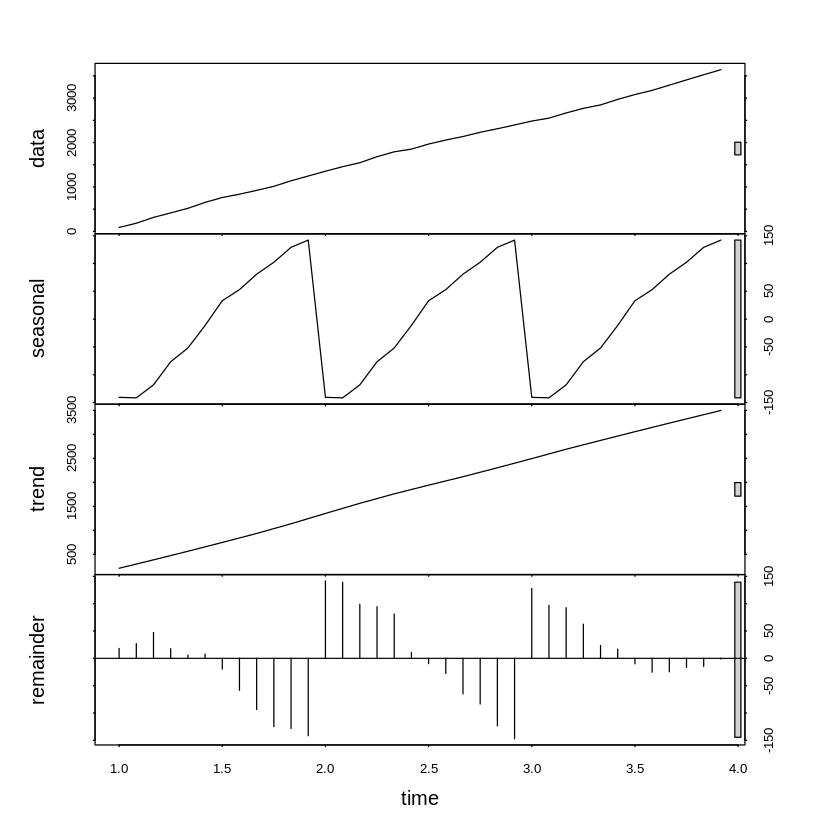

In [ ]:
library(ggplot2)
install.packages("forecast")
library(forecast)

set.seed(123)
months <- seq(as.Date("2021-01-01"), by = "month", length.out = 36)
sales <- cumsum(rnorm(36, mean = 100, sd = 20))

sales_data <- data.frame(Date = months, Sales = sales)

ggplot(sales_data, aes(x = Date, y = Sales)) +
  geom_line(color = "blue") +
  geom_smooth(method = "loess", color = "red", span = 0.2) +
  labs(title = "Monthly Sales with Trend Line",
       x = "Month", y = "Sales")

ts_data <- ts(sales_data$Sales, frequency = 12)
decomposed <- stl(ts_data, s.window = "periodic")
plot(decomposed)

2) Create a bar chart where each bar represents a product category and the height of the bar represents the average satisfaction score. Optionally, use error bars or confidence intervals to show variability. Interpretation involves comparing the heights of the bars to identify which categories have higher or lower satisfaction levels.


---



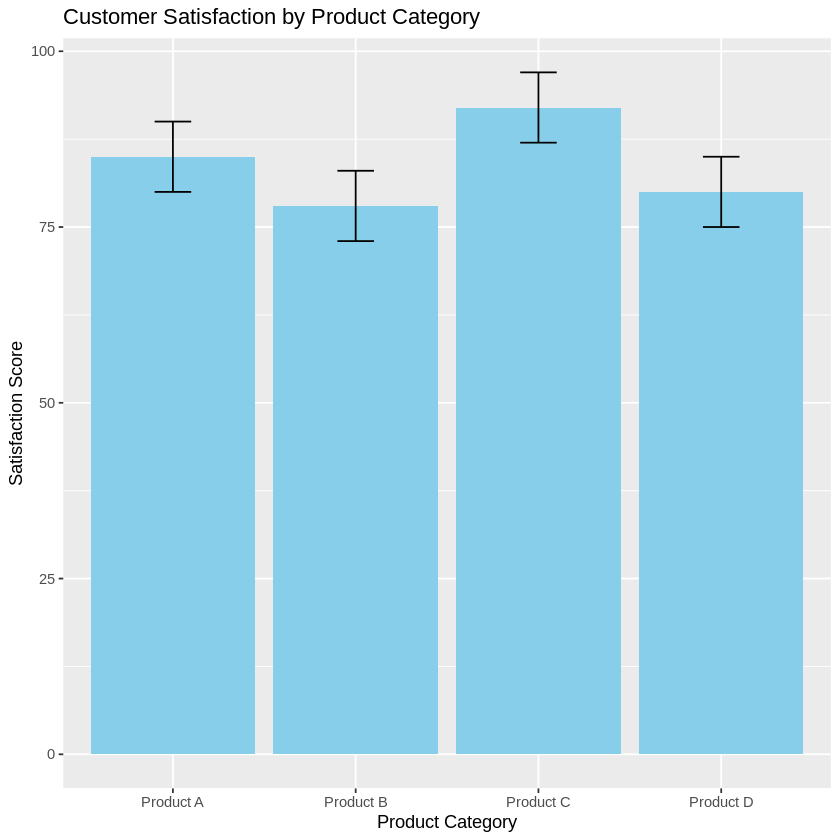

In [ ]:
categories <- c("Product A", "Product B", "Product C", "Product D")
satisfaction <- c(85, 78, 92, 80)

satisfaction_data <- data.frame(Category = categories, Satisfaction = satisfaction)

ggplot(satisfaction_data, aes(x = Category, y = Satisfaction)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  geom_errorbar(aes(ymin = Satisfaction - 5, ymax = Satisfaction + 5), width = 0.2) +
  labs(title = "Customer Satisfaction by Product Category",
       x = "Product Category", y = "Satisfaction Score")

3)Create a scatter plot where each point represents a campaign, with advertising spending on the x-axis and sales revenue on the y-axis. Add a trend line or regression line to visualize the overall relationship. Interpretation involves assessing whether increased spending correlates with higher revenue based on the slope and direction of the trend line.


---



`geom_smooth()` using formula = 'y ~ x'


[1] 0.6948166

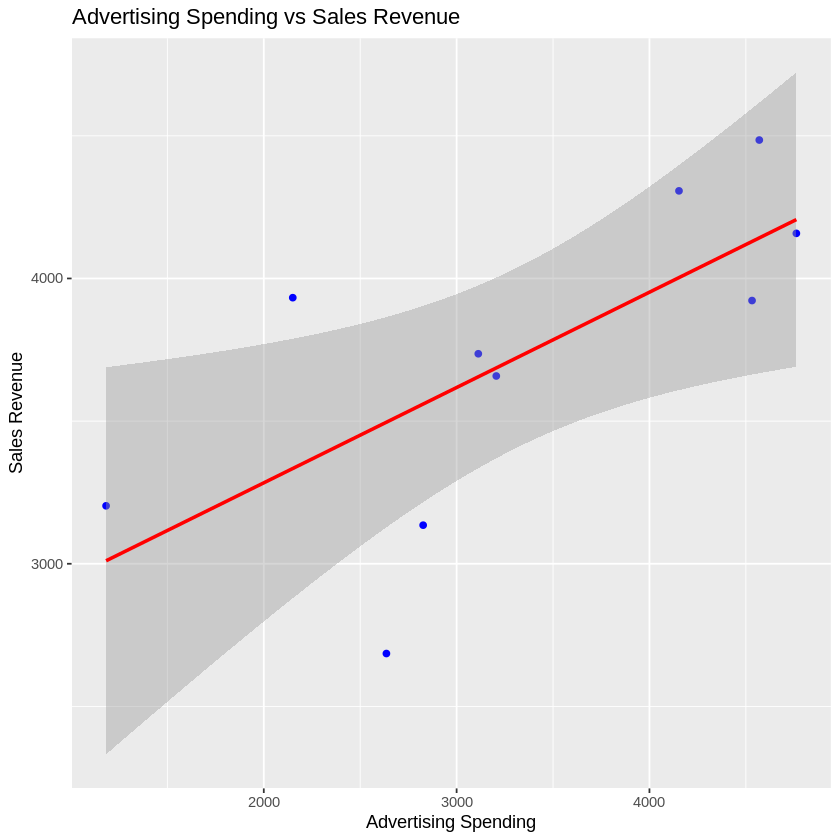

In [ ]:
set.seed(123)
advertising_spending <- runif(10, min = 1000, max = 5000)
sales_revenue <- advertising_spending * 0.5 + rnorm(10, mean = 2000, sd = 500)

ad_data <- data.frame(Advertising = advertising_spending, Sales = sales_revenue)

ggplot(ad_data, aes(x = Advertising, y = Sales)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", color = "red") +
  labs(title = "Advertising Spending vs Sales Revenue",
       x = "Advertising Spending", y = "Sales Revenue")

cor(ad_data$Advertising, ad_data$Sales)

4)Create a box plot where the box represents the interquartile range (IQR) of weights, with whiskers extending to show the range of normal variation. Outliers are shown as individual points beyond the whiskers. Interpretation involves identifying points outside the whiskers as potential outliers based on the spread of the data.


---



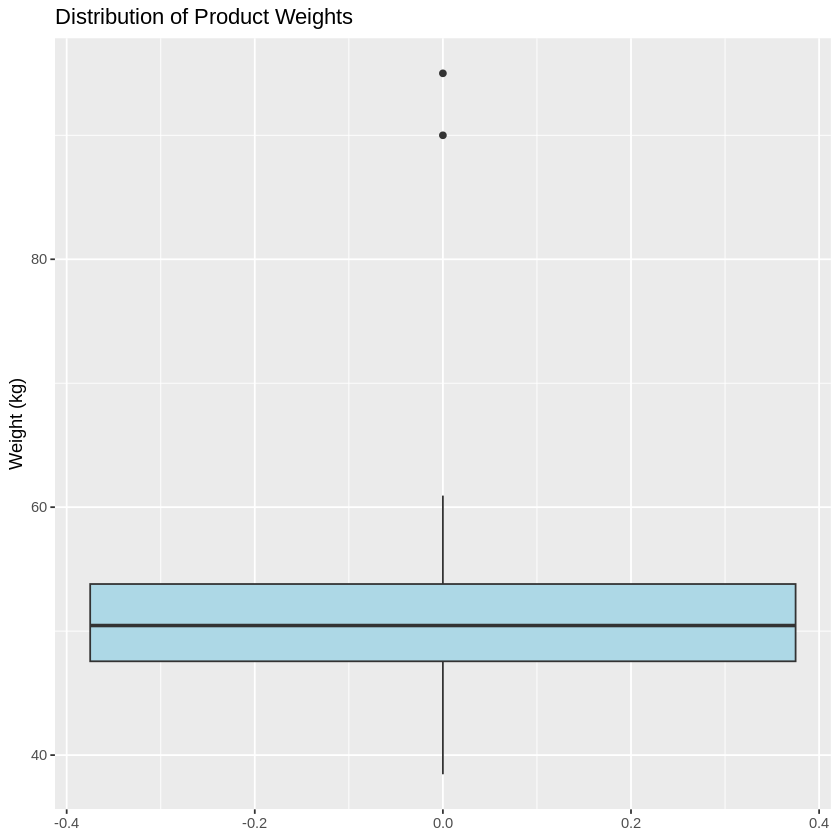

In [ ]:
set.seed(123)
weights <- c(rnorm(100, mean = 50, sd = 5), 90, 95)

weights_data <- data.frame(Weights = weights)

ggplot(weights_data, aes(y = Weights)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Distribution of Product Weights",
       y = "Weight (kg)")

5)Plot a line chart where the x-axis represents months and the y-axis represents website traffic. Add a trend line or moving average to visualize the overall trend in traffic over the year.


---



`geom_smooth()` using formula = 'y ~ x'


ERROR: Error in stl(ts_data, s.window = "periodic"): series is not periodic or has less than two periods


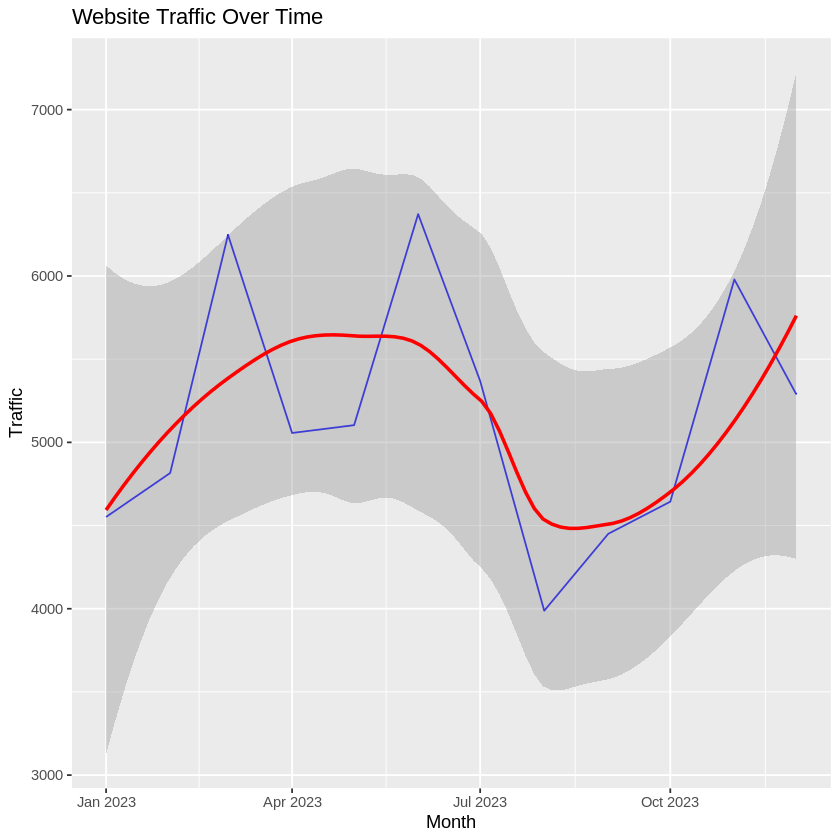

In [ ]:
set.seed(123)
months <- seq(as.Date("2023-01-01"), by = "month", length.out = 12)
traffic <- rnorm(12, mean = 5000, sd = 800)

traffic_data <- data.frame(Date = months, Traffic = traffic)

ggplot(traffic_data, aes(x = Date, y = Traffic)) +
  geom_line(color = "blue") +
  geom_smooth(method = "loess", color = "red") +
  labs(title = "Website Traffic Over Time",
       x = "Month", y = "Traffic")

ts_data <- ts(traffic_data$Traffic, frequency = 12)
decomposed <- stl(ts_data, s.window = "periodic")
plot(decomposed)

traffic_data$Anomaly <- abs(traffic_data$Traffic - mean(traffic_data$Traffic)) > sd(traffic_data$Traffic)
ggplot(traffic_data, aes(x = Date, y = Traffic)) +
  geom_line(color = "blue") +
  geom_point(aes(color = Anomaly), size = 2) +
  labs(title = "Website Traffic with Anomalies",
       x = "Month", y = "Traffic")